In [13]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob.classifiers import NaiveBayesClassifier

from helpers import *
%matplotlib inline

# Lies detector from statements

In this section the idea is to replicate the result obtained by the paper of reference and see if we can detect lies from the statements given from only the text of the statements.

## Data loading and preparation

In [14]:
## Define paths
DATA_FOLDER = './data/'
TRAIN_PATH = DATA_FOLDER + 'train.tsv'
TEST_PATH = DATA_FOLDER + 'test.tsv'
VALID_PATH = DATA_FOLDER + 'valid.tsv'

In [15]:
CLEAN_TRAIN = DATA_FOLDER + "train_clean.txt"
CLEAN_TEST = DATA_FOLDER + "test_clean.txt"
CLEAN_VALID = DATA_FOLDER + "valid_clean.txt"

In [16]:
# Loading data and convert labels in "dummy scale"

train_data = load_data(TRAIN_PATH)
test_data = load_data(TEST_PATH)
valid_data = load_data(VALID_PATH)

train_data.label = convert_label(train_data)
test_data.label = convert_label(test_data)
valid_data.label = convert_label(valid_data)

train_data = train_data[["statement", "label"]]
test_data = test_data[["statement", "label"]]
valid_data = valid_data[["statement", "label"]]

In [17]:
train_data.label[train_data.label <= 0] = 0
train_data.label[train_data.label > 0] = 1

test_data.label[test_data.label <= 0] = 0
test_data.label[test_data.label > 0] = 1

valid_data.label[valid_data.label <= 0] = 0
valid_data.label[valid_data.label > 0] = 1

We will work with the Liar Dataset only and we will analyze only the statement columns.

## Data exploration

Before going through the preprocessing and training, we will collect some data to understand better the samples we have.

In [18]:
# Dimension of the data

# Train
print("Train data dimension:", train_data.shape[0])

# Test
print("Test data dimension:", test_data.shape[0])

# Validation
print("Validation data dimension:", valid_data.shape[0])

Train data dimension: 10240
Test data dimension: 1267
Validation data dimension: 1284


In [19]:
# Mean of the number of words per statement

# Train 
print("Train set, average statement length in words:", np.mean(train_data.statement.str.split().str.len()))

# Test
print("Test set, average statement length in words:", np.mean(test_data.statement.str.split().str.len()))

# Validation
print("Validation set, average statement length in words:", np.mean(valid_data.statement.str.split().str.len()))

Train set, average statement length in words: 18.01005859375
Test set, average statement length in words: 18.40410418310971
Validation set, average statement length in words: 17.925233644859812


In [20]:
# Median of the number of words per statement

# Train
print("Train set, median value of the statement length in words:", np.median(train_data.statement.str.split().str.len()))

# Test
print("Test set, median value of the statement length in words:", np.median(test_data.statement.str.split().str.len()))

# Validation
print("Validation set, median value of the statement length in words:", np.median(valid_data.statement.str.split().str.len()))

Train set, median value of the statement length in words: 17.0
Test set, median value of the statement length in words: 16.0
Validation set, median value of the statement length in words: 17.0


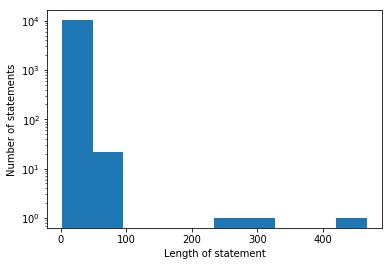

In [21]:
# Distribution of the lengths of the statements

# Train
plot_length_statement_distr(train_data.statement)

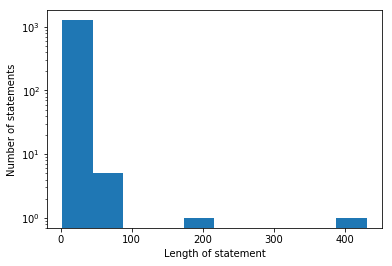

In [22]:
# Test
plot_length_statement_distr(test_data.statement)

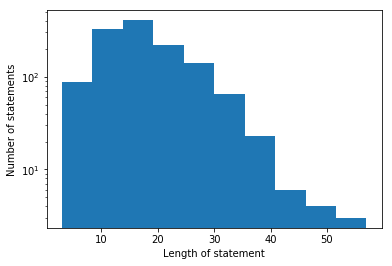

In [23]:
# Validation
plot_length_statement_distr(valid_data.statement)

The mean and median number of statements are pretty much the same for train, test and validation data and we can see from the plots that most of the statements are inside the range 0-70 or 0-60, we can notice just few outliers in the train and test set.  

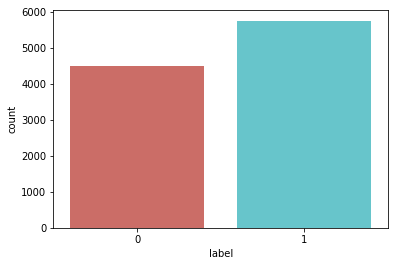

In [24]:
# Label distribution

# Train
plot_label_distribution(train_data)

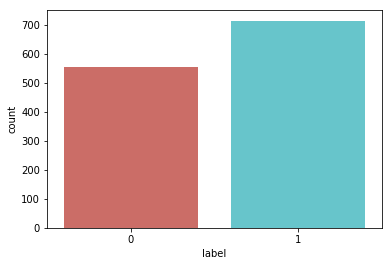

In [25]:
# Test
plot_label_distribution(test_data)

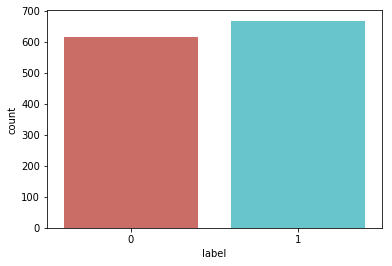

In [26]:
# Validation
plot_label_distribution(valid_data)

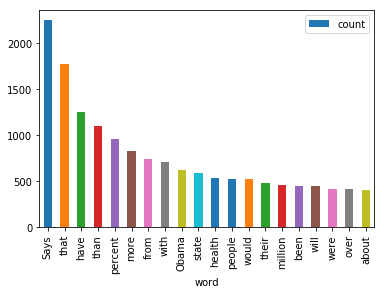

In [27]:
# Word frequencies (words shorter than 3 excluded)

# Train
plot_freq_word(train_data.statement)

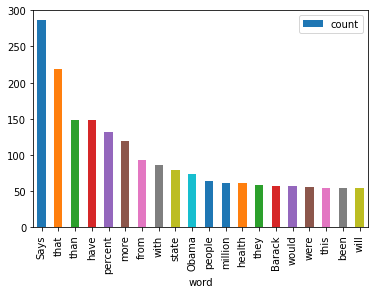

In [28]:
# Test
plot_freq_word(test_data.statement)

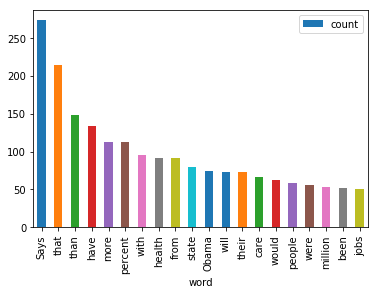

In [29]:
# Validation
plot_freq_word(valid_data.statement)

## Data preprocessing

We cleaned and preprocessed the text data by using some basic techniques such as removing stopwords and punctuation and lemmatization. The entire pipeline is illustrated in the helpers.py file.

In [30]:
# Cleaning text data
clean_train_df = clean_data(train_data, "statement")
clean_test_df = clean_data(test_data, "statement")
clean_valid_df = clean_data(valid_data, "statement")

# Training

We decided to run different classifiers for the training session but we will focus once again on NLTK Naive Bayes since it was the one who provided the best performance.

## NLTK Naive Bayes

In [31]:
# Converting dataframes to list of tuples
st_list_tr = convertToTupleList(clean_train_df)
st_list_te = convertToTupleList(clean_test_df)
st_list_va = convertToTupleList(clean_valid_df)

In [32]:
# Training
nltk_classifier = train_NLTK_NB(st_list_tr)

In [33]:
# Testing
test_set = test_NLTK_NB(st_list_te, nltk_classifier)

Accuracy:  0.6124704025256511


The accuracy is low and very similar to the one obtained in the headline classifier. As said in that section, this is due to the small size of the data and the multi-label classification we are doing. Since our goal was to replicate the results of the Liar Dataset paper, we can say that we accomplished it since the value is very similar to the one obtained there but we will try to focus more on the other insights that the model can give us.  

In [34]:
# Show most informative features
nltk_classifier.show_most_informative_features()

Most Informative Features
                takeover = True                0 : 1      =     11.5 : 1.0
                  scheme = True                0 : 1      =      9.8 : 1.0
              cuccinelli = True                0 : 1      =      8.1 : 1.0
                  bottom = True                1 : 0      =      7.6 : 1.0
               socialist = True                0 : 1      =      7.4 : 1.0
                     ken = True                0 : 1      =      7.4 : 1.0
                  showed = True                0 : 1      =      7.3 : 1.0
                illegals = True                0 : 1      =      7.3 : 1.0
                    lane = True                0 : 1      =      7.3 : 1.0
               mcauliffe = True                0 : 1      =      7.3 : 1.0


We can analyze the most informative features in order to understand if there are some meaninful words that contribute to classify better the statements. The likelihood ratio on the right can be useful for comparing different feature-outcome relationships.

In [35]:
# List of some other informative features
nltk_classifier.most_informative_features(30)

[('takeover', True),
 ('scheme', True),
 ('cuccinelli', True),
 ('bottom', True),
 ('socialist', True),
 ('ken', True),
 ('showed', True),
 ('illegals', True),
 ('lane', True),
 ('mcauliffe', True),
 ('frank', True),
 ('indiana', True),
 ('richest', True),
 ('story', True),
 ('bulb', True),
 ('push', True),
 ('knew', True),
 ('sitting', True),
 ('richard', True),
 ('decide', True),
 ('wisconsinite', True),
 ('jeanne', True),
 ('overhaul', True),
 ('hussein', True),
 ('worth', True),
 ('unemployed', True),
 ('passing', True),
 ('happened', True),
 ('share', True),
 ('face', True)]

In [36]:
probs = nltk_classifier.classify_many([fs for (fs, l) in test_set])

In [37]:
# Consufion matrix
from nltk.metrics import ConfusionMatrix
cm = ConfusionMatrix(probs, clean_test_df.label.values)
print(cm)

  |   0   1   2 |
--+-------------+
0 |<287>225   . |
1 | 266<489>  . |
2 |   .   .  <.>|
--+-------------+
(row = reference; col = test)



In [38]:
all_words = set(word.lower() for passage in st_list_tr for word in word_tokenize(passage[0]))
train_set = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in st_list_tr]

In [39]:
probs_train = nltk_classifier.classify_many([fs for (fs, l) in train_set])

In [40]:
np.save("st_text_out_tr", probs_train)
np.save("st_text_out_te", probs)

## TextBlob Naive Bayes

In [233]:
tb_classifier = NaiveBayesClassifier(st_list_tr)

In [234]:
tb_classifier.accuracy(st_list_te)

0.2456556082148499

## Sklearn classifiers

In [226]:
# Save text data to be processed
save_data(clean_train_df, "statement", CLEAN_TRAIN)
save_data(clean_test_df, "statement", CLEAN_TEST)
save_data(clean_valid_df, "statement", CLEAN_VALID)

0

In [ ]:
# Now the scripts to create word embeddings must be ran

In [227]:
# Get text features
train_feat = getFeatures(CLEAN_TRAIN)
test_feat = getFeatures(CLEAN_TEST)
valid_feat = getFeatures(CLEAN_VALID)

In [228]:
# Splitting data and get labels
train_data, train_labels = shuffle(np.array(train_feat), clean_train_df.label.values)
test_data, test_labels = shuffle(np.array(test_feat), clean_test_df.label.values)
valid_data, valid_labels = shuffle(np.array(valid_feat), clean_valid_df.label.values)

### Random forest

In [229]:
probs = train_RF(train_data, train_labels, test_data, test_labels)

0.19793322734499205


array([ 3, -1,  1, ...,  1,  2,  1])

### Logistic regression

In [232]:
probs = train_LR(train_data, train_labels, test_data, test_labels)

0.21542130365659778


array([ 1, -1,  1, ..., -1, -1,  1])

### Support vector machine

In [231]:
probs = train_SVM(train_data, train_labels, test_data, test_labels)

0.21144674085850557


array([ 1, -1,  1, ..., -1, -1,  1])